<a href="https://colab.research.google.com/github/ollihansen90/MatheSH_Pseudozufall/blob/main/LCG_Kreis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generator(a, b, m):
    def lcg(x):
        return (a*x+b)%m
    return lcg

def generator_fib(m):
    def lcg_fib(x1, x2):
        return (x1+x2)%m
    return lcg_fib

def generator_allg(a, b, m):
    def lcg_allg(x):
        if len(x)<len(a):
            x = (len(a)-len(x))*[0]+x[::-1]
        else:
            x = x[-len(a):]
        v = sum([aa*xx for aa, xx in zip(a, x[::-1])])+b
        return v%m
    return lcg_allg

0 -> 8 -> 19 -> 6 -> 10 -> 3 -> 9 -> 11 -> 20 -> 23 -> 24 -> 16 -> 5 -> 18 -> 14 -> 21 -> 15 -> 13 -> 4 -> 1 -> 0 -> 8 -> 19 -> 6 -> 10 -> 3


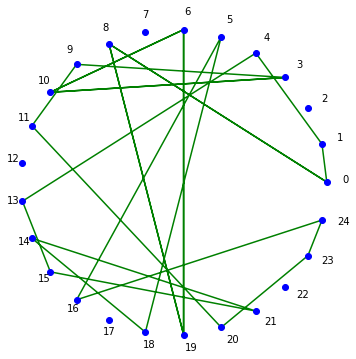

In [ ]:
a, b, m = 17, 8, 25
#a, b, m = 2, 3, 13
#a, b, m = 1, 2, 6
seed = 0

winkel = np.linspace(0, 2*np.pi, endpoint=False, num=m)
kreis = np.stack((np.cos(winkel), np.sin(winkel)))
textkoords = (1.1*kreis).T
lcg = generator(a, b, m)

folge = [seed]
for _ in range(m):
    folge.append(int(lcg(folge[-1])))
print(*folge, sep=" -> ")

plt.figure(figsize=[6,6])
plt.plot(kreis[0,folge], kreis[1,folge], "g-");plt.plot(kreis[0], kreis[1], "bo")
for i, koord in enumerate(textkoords):
    plt.text(koord[0], koord[1], str(i))
plt.axis("equal");plt.axis("off");plt.ylim([-1.5,1.5]);plt.show()

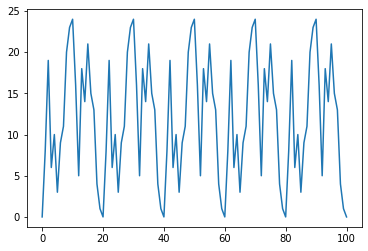

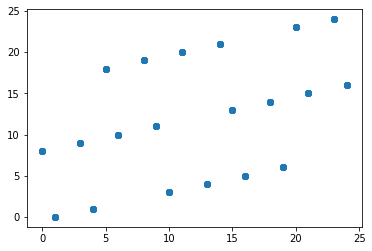

In [ ]:
N = 100
a, b, m = 17, 8, 25
#a, b, m = 2, 3, 13
#a, b, m = 1, 2, 6
seed = 0

folge = [seed]
for _ in range(N):
    folge.append(int(lcg(folge[-1])))

plt.figure()
plt.plot(folge)
plt.show()
plt.figure()
plt.scatter(folge[:-1], folge[1:])
plt.show()
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(folge[:-2], folge[1:-1], folge[2:])
    plt.show()

0
16
32
48
64
80
96
112
128
144
160
176
192
208
224
240
256
272
288
304
320
336
352
368
384
400
416
432
448
464
480
496
512
528
544
560
576
592
608
624
640
656
672
688
704
720
736
752
768
784
800
816
832
848
864
880
896
912
928
944
960
976
992
2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4

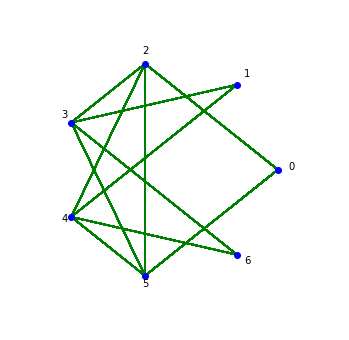

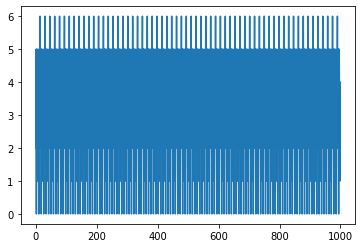

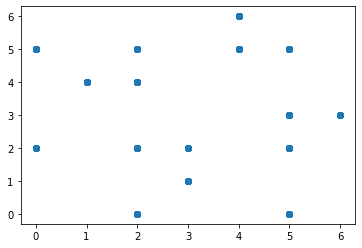

In [ ]:
#seed1, seed2, m = 37, 28, 72
seed1, seed2, m = 2, 5, 7
N = 1000

winkel = np.linspace(0, 2*np.pi, endpoint=False, num=m)
kreis = np.stack((np.cos(winkel), np.sin(winkel)))
textkoords = (1.1*kreis).T
lcg_fib = generator_fib(m)

folge = [seed1, seed2]
for i in range(N-2):
    if folge[-2]==folge[0] and folge[-1]==folge[1]:
        print(i)
    folge.append(int(lcg_fib(folge[-1], folge[-2])))
print(*folge, sep=" -> ")

plt.figure(figsize=[6,6])
plt.plot(kreis[0,folge], kreis[1,folge], "g-");plt.plot(kreis[0], kreis[1], "bo")
for i, koord in enumerate(textkoords):
    plt.text(koord[0], koord[1], str(i))
plt.axis("equal");plt.axis("off");plt.ylim([-1.5,1.5]);plt.show()


plt.figure()
plt.plot(folge)
plt.show()
plt.figure()
plt.scatter(folge[:-1], folge[1:])
plt.show()
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(folge[:-2], folge[1:-1], folge[2:])
    plt.show()

2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 5 -> 2 -> 0 -> 2 -> 2 -> 4 -> 6 -> 3 -> 2 -> 5 -> 0 -> 5 -> 5 -> 3 -> 1 -> 4 -> 

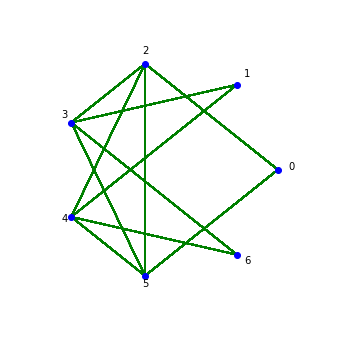

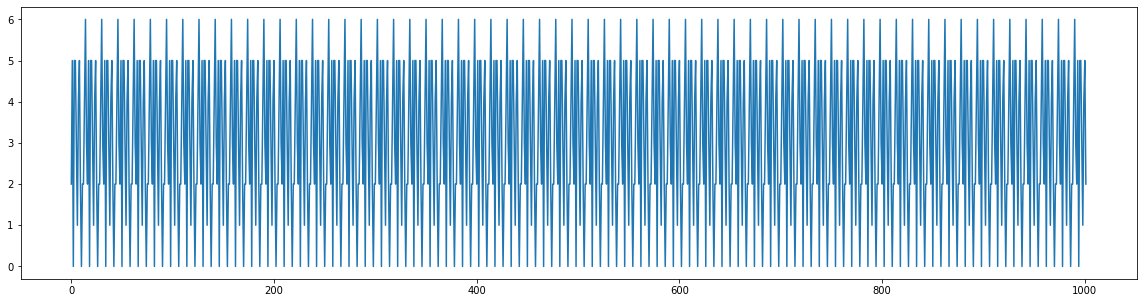

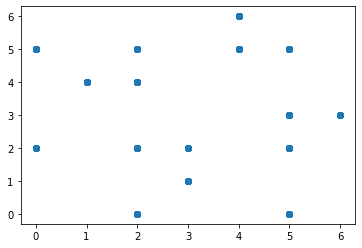

In [ ]:
#a = [5,4,3,2,1]
a = [1,1]
b, m = 0, 7
#b, m = 5, 13
N = 1000
seed = 0
lcg = generator_allg(a, b, m)

folge = [2,5]
for _ in range(N):
    folge.append(int(lcg(folge)))
print(*folge, sep=" -> ")

winkel = np.linspace(0, 2*np.pi, endpoint=False, num=m)
kreis = np.stack((np.cos(winkel), np.sin(winkel)))
textkoords = (1.1*kreis).T
plt.figure(figsize=[6,6])
plt.plot(kreis[0,folge], kreis[1,folge], "g-");plt.plot(kreis[0], kreis[1], "bo")
for i, koord in enumerate(textkoords):
    plt.text(koord[0], koord[1], str(i))
plt.axis("equal");plt.axis("off");plt.ylim([-1.5,1.5]);plt.show()

plt.figure(figsize=[20,5])
plt.plot(folge)
plt.show()
plt.figure()
plt.scatter(folge[:-1], folge[1:])
plt.show()
if False:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.scatter(folge[:-2], folge[1:-1], folge[2:])
    plt.show()